In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
PER_EPOCH_FNAME = "./outputs/per_epoch_for_d3.csv"
POSTPROCESS_FNAME = "./outputs/postprocess_for_d3.csv"

per_epoch_df = pd.read_csv(PER_EPOCH_FNAME, header=0, index_col=False)
postprocess_df = pd.read_csv(POSTPROCESS_FNAME, header=0, index_col=False)

METRIC_COLNAMES = [
    "average_local_error",
    "class_aware_continuity",
    "class_aware_trustworthiness",
    "continuity",
    "distance_consistency",
    "false_neighbors",
    "jaccard",
    "mrre_data",
    "mrre_proj",
    "neighborhood_hit",
    "normalized_stress",
    "pearson_correlation",
    "procrustes",
    "scale_normalized_stress",
    "shepard_goodness",
    "true_neighbors",
    "trustworthiness",
]

In [3]:
def _id(x):
    return x


def _flip(x):
    return 1 - x

def _negate(x):
    return -x

def _shift_scale(shift:float, scale: float):
    return lambda x: scale * (x - shift)

def _shift(by:float):
    return _shift_scale(by, 1.0)

def _flip_shift(by:float):
    return lambda x: by - x



adapters = {k: _id for k in per_epoch_df.columns}
metric_adapters = {
    "average_local_error": _id,
    "class_aware_continuity": _flip,
    "class_aware_trustworthiness": _flip,
    "continuity": _flip,
    "distance_consistency": _flip,
    "false_neighbors": _id,
    "jaccard": _flip,
    "mrre_data": _id,
    "mrre_proj": _id,
    "neighborhood_hit": _flip,
    "normalized_stress": _id,
    "pearson_correlation": lambda x: _flip((1 + x) / 2),
    "procrustes": _id,
    "scale_normalized_stress": _id,
    "shepard_goodness": lambda x: _flip((1 + x) / 2),
    "true_neighbors": _flip,
    "trustworthiness": _flip,
}
adapters |= metric_adapters

In [4]:
## ALTERNATIVE ADAPTERS FOR "BIGGER IS BETTER" ENCODING
from typing import Callable, Mapping


metric_adapters: Mapping[str, Callable[[float], float]] = {
    "average_local_error": _negate,
    "class_aware_continuity": _id,
    "class_aware_trustworthiness": _id,
    "continuity": _id,
    "distance_consistency": _id,
    "false_neighbors": _negate,
    "jaccard": _id,
    "mrre_data": _negate,
    "mrre_proj": _negate,
    "neighborhood_hit": _id,
    "normalized_stress": _negate,
    "pearson_correlation": _shift_scale(1, 0.5),
    "procrustes": _negate,
    "scale_normalized_stress": _negate,
    "shepard_goodness": _shift_scale(1, 0.5),
    "true_neighbors": _id,
    "trustworthiness": _id,

}
adapters |= metric_adapters

In [5]:
per_epoch_df[per_epoch_df.epoch==-1].iloc[0]

epoch                               -1
average_local_error              0.159
class_aware_continuity           0.991
class_aware_trustworthiness      0.994
continuity                       0.988
distance_consistency             0.696
false_neighbors                  0.686
jaccard                          0.209
missing_neighbors                0.686
mrre_data                        0.021
mrre_proj                         0.01
neighborhood_hit                 0.895
normalized_stress                0.832
pearson_correlation              0.597
procrustes                       0.999
scale_normalized_stress          0.161
shepard_goodness                 0.535
true_neighbors                   0.314
trustworthiness                  0.978
projection                        umap
dataset                            har
k                                    7
metric                         jaccard
Name: 11, dtype: object

In [6]:
def calc_diffs(df: pd.DataFrame) -> pd.DataFrame:
    df_c = df.copy()
    metric_vals = df_c[METRIC_COLNAMES]
    assert len(df_c[df_c.epoch == -1]) == 1, f"{len(df_c[df_c.epoch == -1]) = }\n{df_c}"
    diffs = metric_vals - df_c[df_c.epoch == -1][METRIC_COLNAMES].iloc[0]
    df_c[METRIC_COLNAMES] = diffs
    return df_c


In [7]:
adapted_per_epoch_df = per_epoch_df.transform(adapters)

In [8]:
per_epoch_df.iloc[0:12]

,epoch,average_local_error,class_aware_continuity,class_aware_trustworthiness,continuity,distance_consistency,false_neighbors,jaccard,missing_neighbors,mrre_data,...,pearson_correlation,procrustes,scale_normalized_stress,shepard_goodness,true_neighbors,trustworthiness,projection,dataset,k,metric
0,1,0.197,0.949,0.941,0.943,0.655,0.951,0.028,0.951,0.116,...,0.654,0.999,0.149,0.598,0.049,0.885,umap,har,7,jaccard
1,100,0.100,0.976,0.974,0.972,0.708,0.903,0.057,0.903,0.056,...,0.726,0.997,0.112,0.729,0.097,0.944,umap,har,7,jaccard
2,200,0.097,0.978,0.981,0.974,0.694,0.887,0.068,0.887,0.046,...,0.758,0.996,0.097,0.768,0.113,0.954,umap,har,7,jaccard
3,300,0.096,0.978,0.986,0.974,0.705,0.869,0.079,0.869,0.039,...,0.751,0.996,0.098,0.761,0.131,0.961,umap,har,7,jaccard
4,400,0.090,0.979,0.989,0.974,0.700,0.848,0.092,0.848,0.034,...,0.750,0.995,0.097,0.760,0.152,0.966,umap,har,7,jaccard
5,500,0.086,0.978,0.991,0.974,0.691,0.833,0.102,0.833,0.030,...,0.752,0.995,0.095,0.763,0.167,0.970,umap,har,7,jaccard
6,600,0.083,0.979,0.992,0.974,0.699,0.818,0.113,0.818,0.028,...,0.744,0.994,0.095,0.755,0.182,0.972,umap,har,7,jaccard
7,700,0.081,0.979,0.993,0.974,0.696,0.794,0.130,0.794,0.024,...,0.745,0.994,0.094,0.757,0.206,0.976,umap,har,7,jaccard
8,800,0.081,0.978,0.993,0.974,0.694,0.792,0.132,0.792,0.023,...,0.750,0.994,0.092,0.762,0.208,0.977,umap,har,7,jaccard
9,900,0.078,0.979,0.994,0.974,0.697,0.773,0.145,0.773,0.020,...,0.753,0.994,0.090,0.766,0.227,0.979,umap,har,7,jaccard


In [10]:
adapted_postprocess_df = postprocess_df.transform(
    {k: _id for k in postprocess_df.columns} | metric_adapters
)

In [11]:
per_epoch_diffs = per_epoch_df.groupby(by=['dataset', 'projection', 'metric', 'k']).apply(calc_diffs, include_groups=False)
per_epoch_diffs = per_epoch_diffs.reset_index()
per_epoch_diffs = per_epoch_diffs[per_epoch_diffs.epoch == 1000]
adapted_diff_df = adapted_per_epoch_df.groupby(by=['dataset', 'projection', 'metric', 'k']).apply(calc_diffs, include_groups=False)
adapted_diff_df = adapted_diff_df.reset_index()
adapted_diff_df = adapted_diff_df[adapted_diff_df.epoch == 1000]


In [12]:
NICE_METRIC_NAMES = {
    "average_local_error": "Avg. Local Error",
    "class_aware_continuity": "Class-Aware Cont.",
    "class_aware_trustworthiness": "Class-Aware Trustw.",
    "continuity": "Continuity",
    "distance_consistency": "Dist. Consistency",
    "false_neighbors": "False Neighbors",
    "jaccard": "Jaccard",
    # "//" "missing_neighbors",
    "mrre_data": "MRRE Data",
    "mrre_proj": "MRRE Projection",
    "neighborhood_hit": "Neighborhood Hit",
    "normalized_stress": "Normalized Stress",
    "pearson_correlation": "Pearson R",
    "procrustes": "Procrustes",
    "scale_normalized_stress": "Scale-Norm. Stress",
    "shepard_goodness": "Shepard Goodness",
    "true_neighbors": "True Neighbors",
    "trustworthiness": "Trustworthiness",
    "all": "ALL",
}

In [13]:
plt.rcParams.update(
    {
        "savefig.dpi": 256,
        "savefig.bbox": "tight",
        "savefig.pad_inches": 0.0,
        "lines.markersize": 2.0,
    }
)
def setup_figure(nrows=1,ncols=1):
    fig, ax = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        dpi=256,
    )
    # ax.axis("off")
    return fig, ax

In [14]:
corr_cmap = sns.diverging_palette(0.0, 240.0, as_cmap=True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

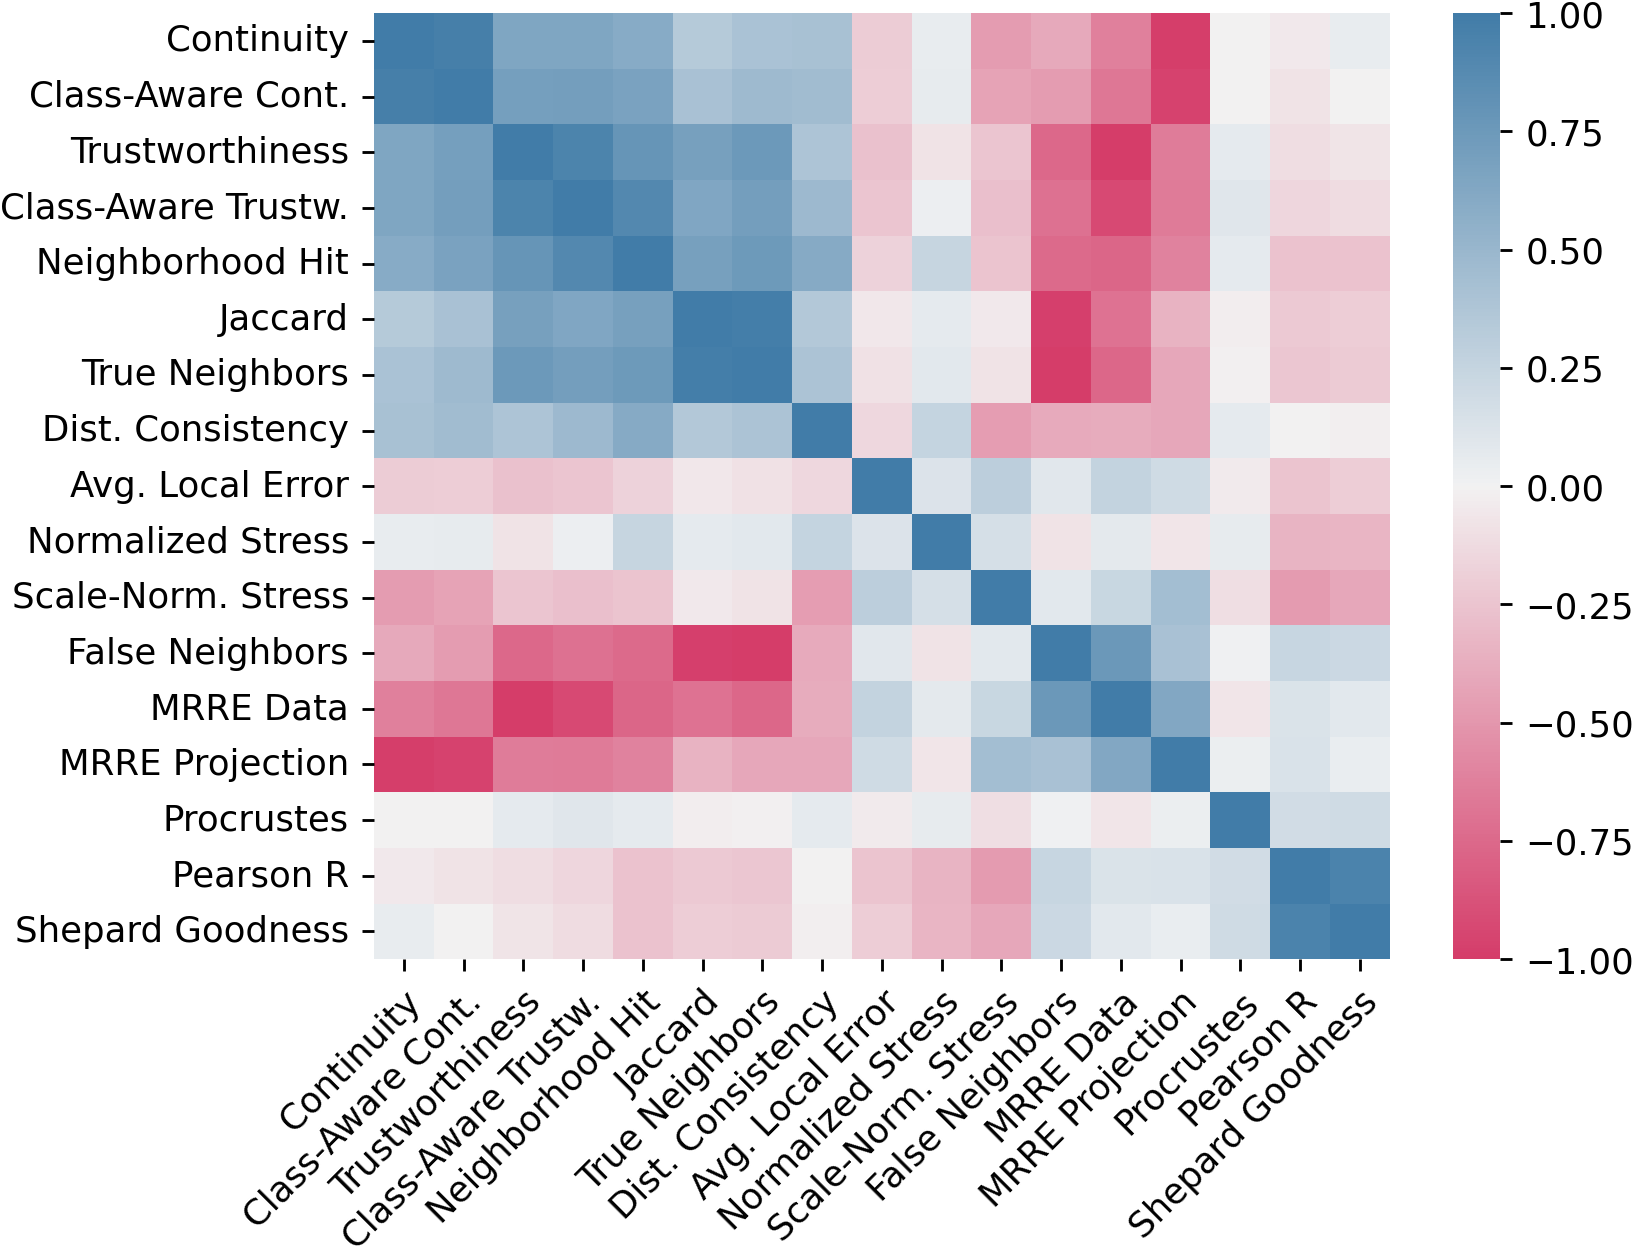

In [ ]:
METRIC_COLNAMES_REORDERED = [
    "continuity",
    "class_aware_continuity",
    "trustworthiness",
    "class_aware_trustworthiness",
    "neighborhood_hit",
    "jaccard",
    "true_neighbors",
    "distance_consistency",
    "average_local_error",
    "normalized_stress",
    "scale_normalized_stress",
    "false_neighbors",
    "mrre_data",
    "mrre_proj",
    "procrustes",
    "pearson_correlation",
    "shepard_goodness",
]

fig, ax = setup_figure()

# ax.axis('off')
sns.heatmap(
    per_epoch_diffs[METRIC_COLNAMES_REORDERED].corr(),
    cmap=corr_cmap,
    xticklabels=(nice_names := [NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES_REORDERED]),
    yticklabels=nice_names,
    vmin=-1.0,
    vmax=1.0,
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor',ha='right')
fig.savefig("./outputs/FoolingCorrMatrix.png")


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

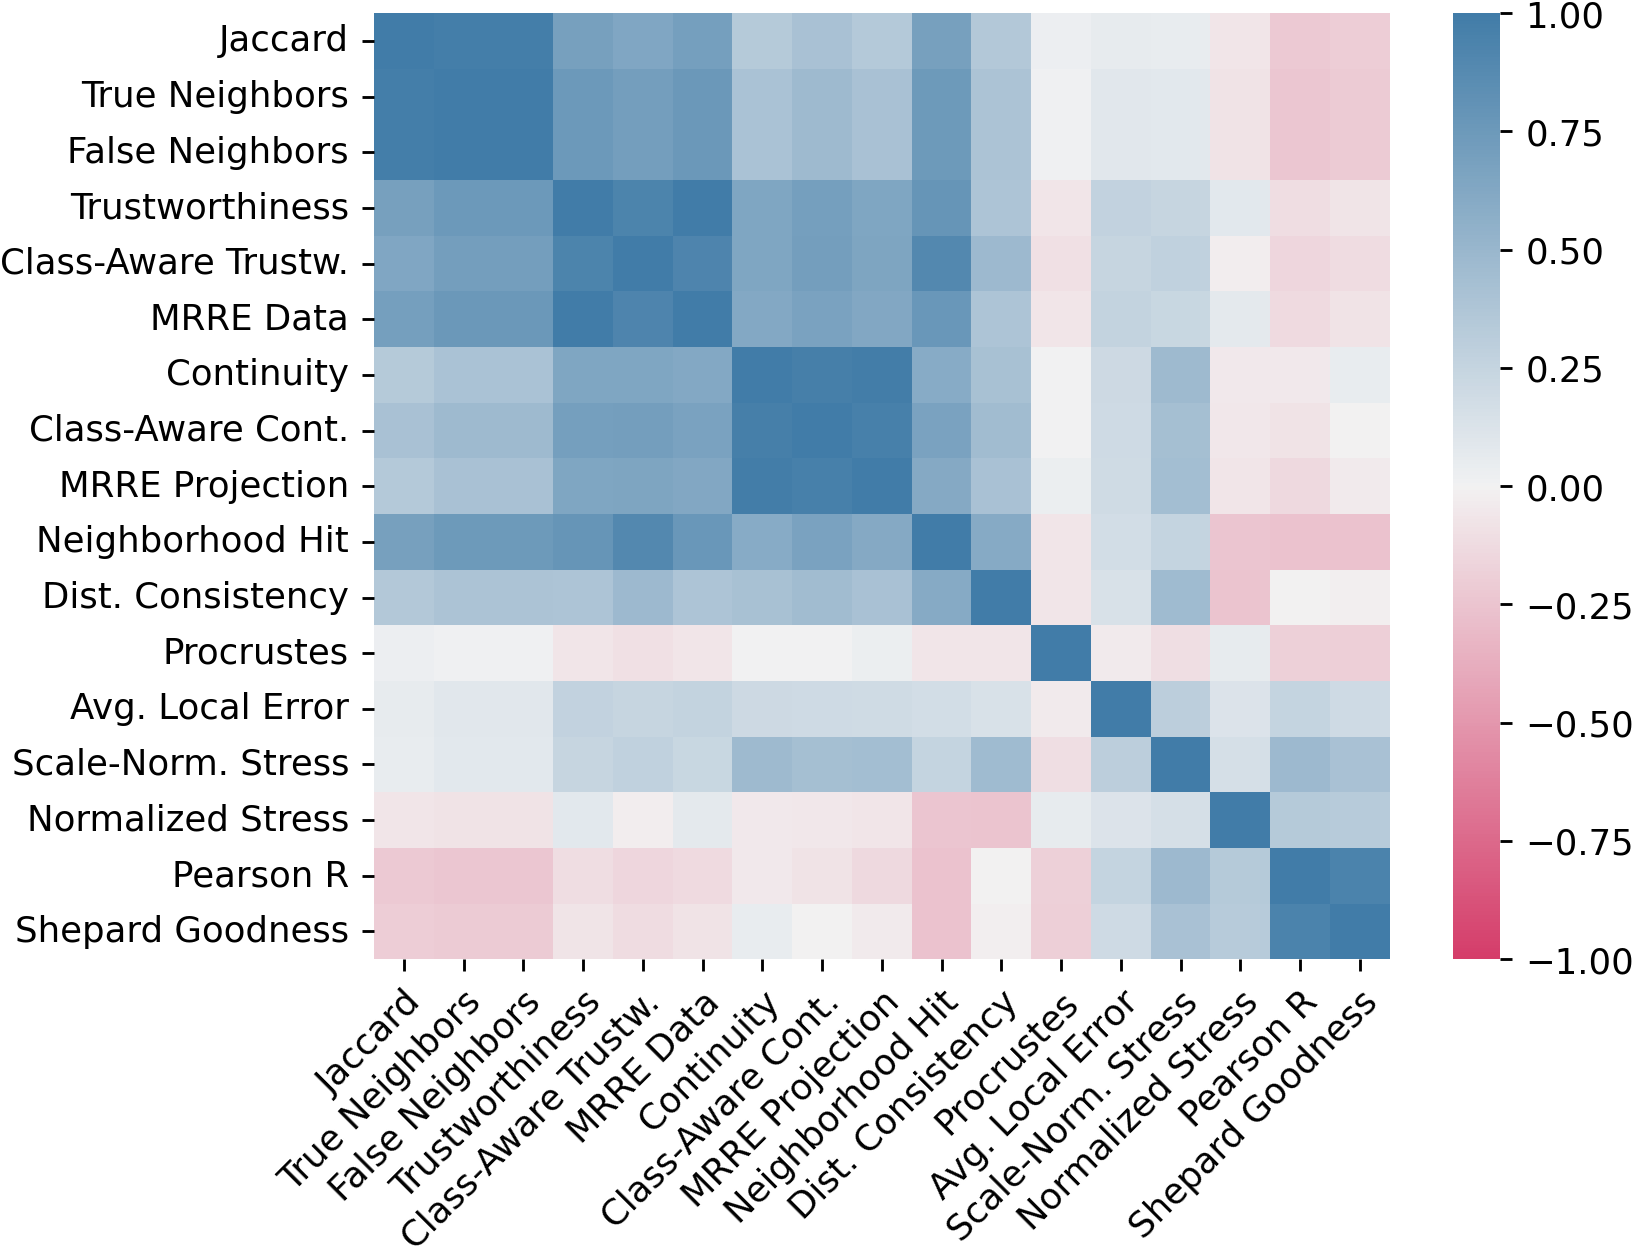

In [ ]:
METRIC_COLNAMES_REORDERED_2 = [
    "jaccard",
    "true_neighbors",
    "false_neighbors",
    "trustworthiness",
    "class_aware_trustworthiness",
    "mrre_data",
    "continuity",
    "class_aware_continuity",
    "mrre_proj",
    "neighborhood_hit",
    "distance_consistency",
    "procrustes",
    "average_local_error",
    "scale_normalized_stress",
    "normalized_stress",
    "pearson_correlation",
    "shepard_goodness",
]

fig, ax = setup_figure()
ax: plt.Axes
# ax.axis('off')
sns.heatmap(
    adapted_diff_df[METRIC_COLNAMES_REORDERED_2].corr(),
    cmap=corr_cmap,
    xticklabels=(nice_names := [NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES_REORDERED_2]),
    yticklabels=nice_names,
    vmin=-1.0,
    vmax=1.0,
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor',ha='right')
fig.savefig('./outputs/AdaptedFoolingCorrMatrix.png')

In [17]:
from sklearn.cluster import HDBSCAN, AgglomerativeClustering

hdbscan_fit = HDBSCAN(min_cluster_size=2, metric='precomputed').fit((1 - adapted_per_epoch_df[adapted_per_epoch_df.epoch.isin((-1, 1000))][METRIC_COLNAMES].corr())/ 2.0)


In [18]:
from itertools import groupby
hdbscan_clusters = {k: list(v) for k, v in groupby(sorted(zip(hdbscan_fit.labels_, METRIC_COLNAMES), key=lambda t:t[0]), key=lambda t: t[0]) }

In [19]:
hdbscan_clusters

{-1: [(-1, 'distance_consistency'),
  (-1, 'neighborhood_hit'),
  (-1, 'normalized_stress'),
  (-1, 'procrustes')],
 0: [(0, 'false_neighbors'), (0, 'jaccard'), (0, 'true_neighbors')],
 1: [(1, 'average_local_error'),
  (1, 'pearson_correlation'),
  (1, 'scale_normalized_stress'),
  (1, 'shepard_goodness')],
 2: [(2, 'class_aware_continuity'), (2, 'continuity'), (2, 'mrre_proj')],
 3: [(3, 'class_aware_trustworthiness'),
  (3, 'mrre_data'),
  (3, 'trustworthiness')]}

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

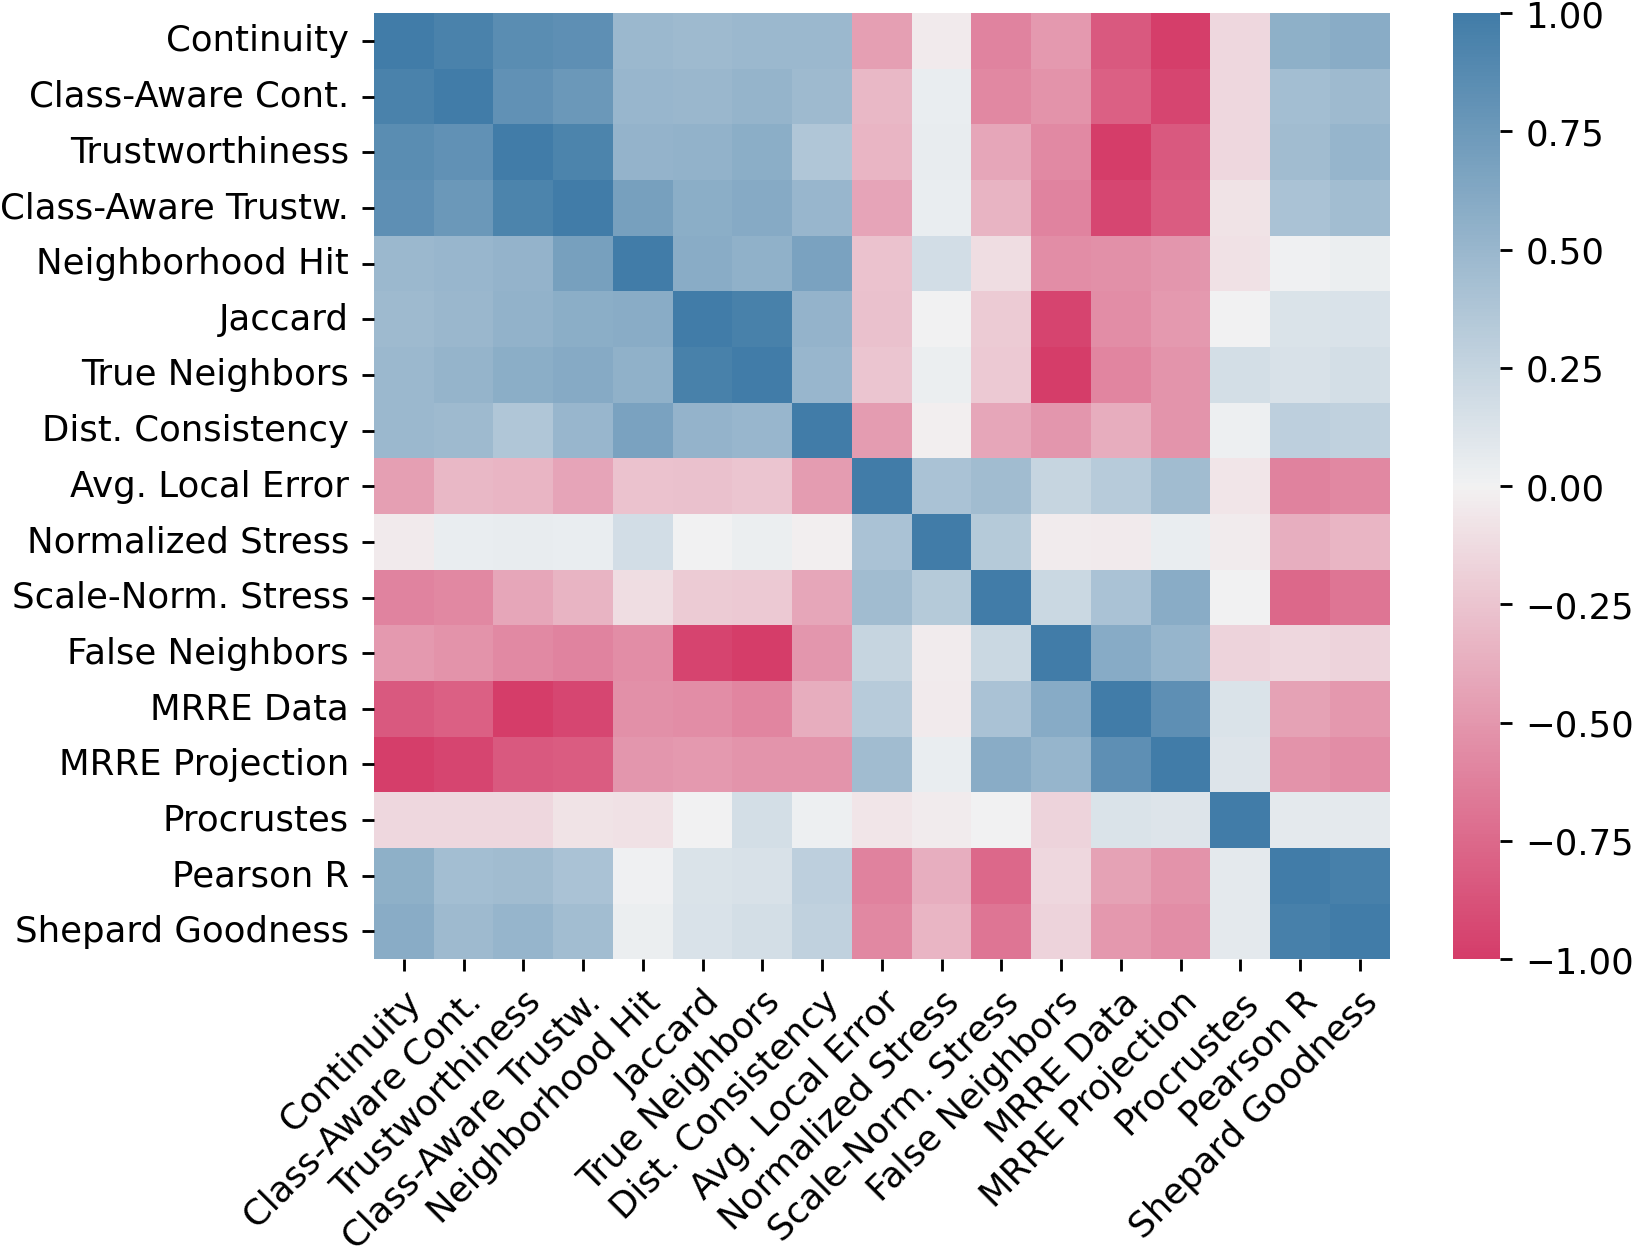

In [20]:
fig, ax = setup_figure()
sns.heatmap(
    per_epoch_df[per_epoch_df.epoch.isin((-1, 1000))][METRIC_COLNAMES_REORDERED].corr(),
    cmap=corr_cmap,
    vmin=-1.0,
    vmax=1.0,
    xticklabels=(nice_names := [NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES_REORDERED]),
    yticklabels=nice_names,
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor',ha='right')
# fig.savefig('RawMetricValuesCorrAllProjs.png')


In [21]:
from pprint import pprint
pprint(hdbscan_clusters)

{-1: [(-1, 'distance_consistency'),
      (-1, 'neighborhood_hit'),
      (-1, 'normalized_stress'),
      (-1, 'procrustes')],
 0: [(0, 'false_neighbors'), (0, 'jaccard'), (0, 'true_neighbors')],
 1: [(1, 'average_local_error'),
     (1, 'pearson_correlation'),
     (1, 'scale_normalized_stress'),
     (1, 'shepard_goodness')],
 2: [(2, 'class_aware_continuity'), (2, 'continuity'), (2, 'mrre_proj')],
 3: [(3, 'class_aware_trustworthiness'),
     (3, 'mrre_data'),
     (3, 'trustworthiness')]}


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

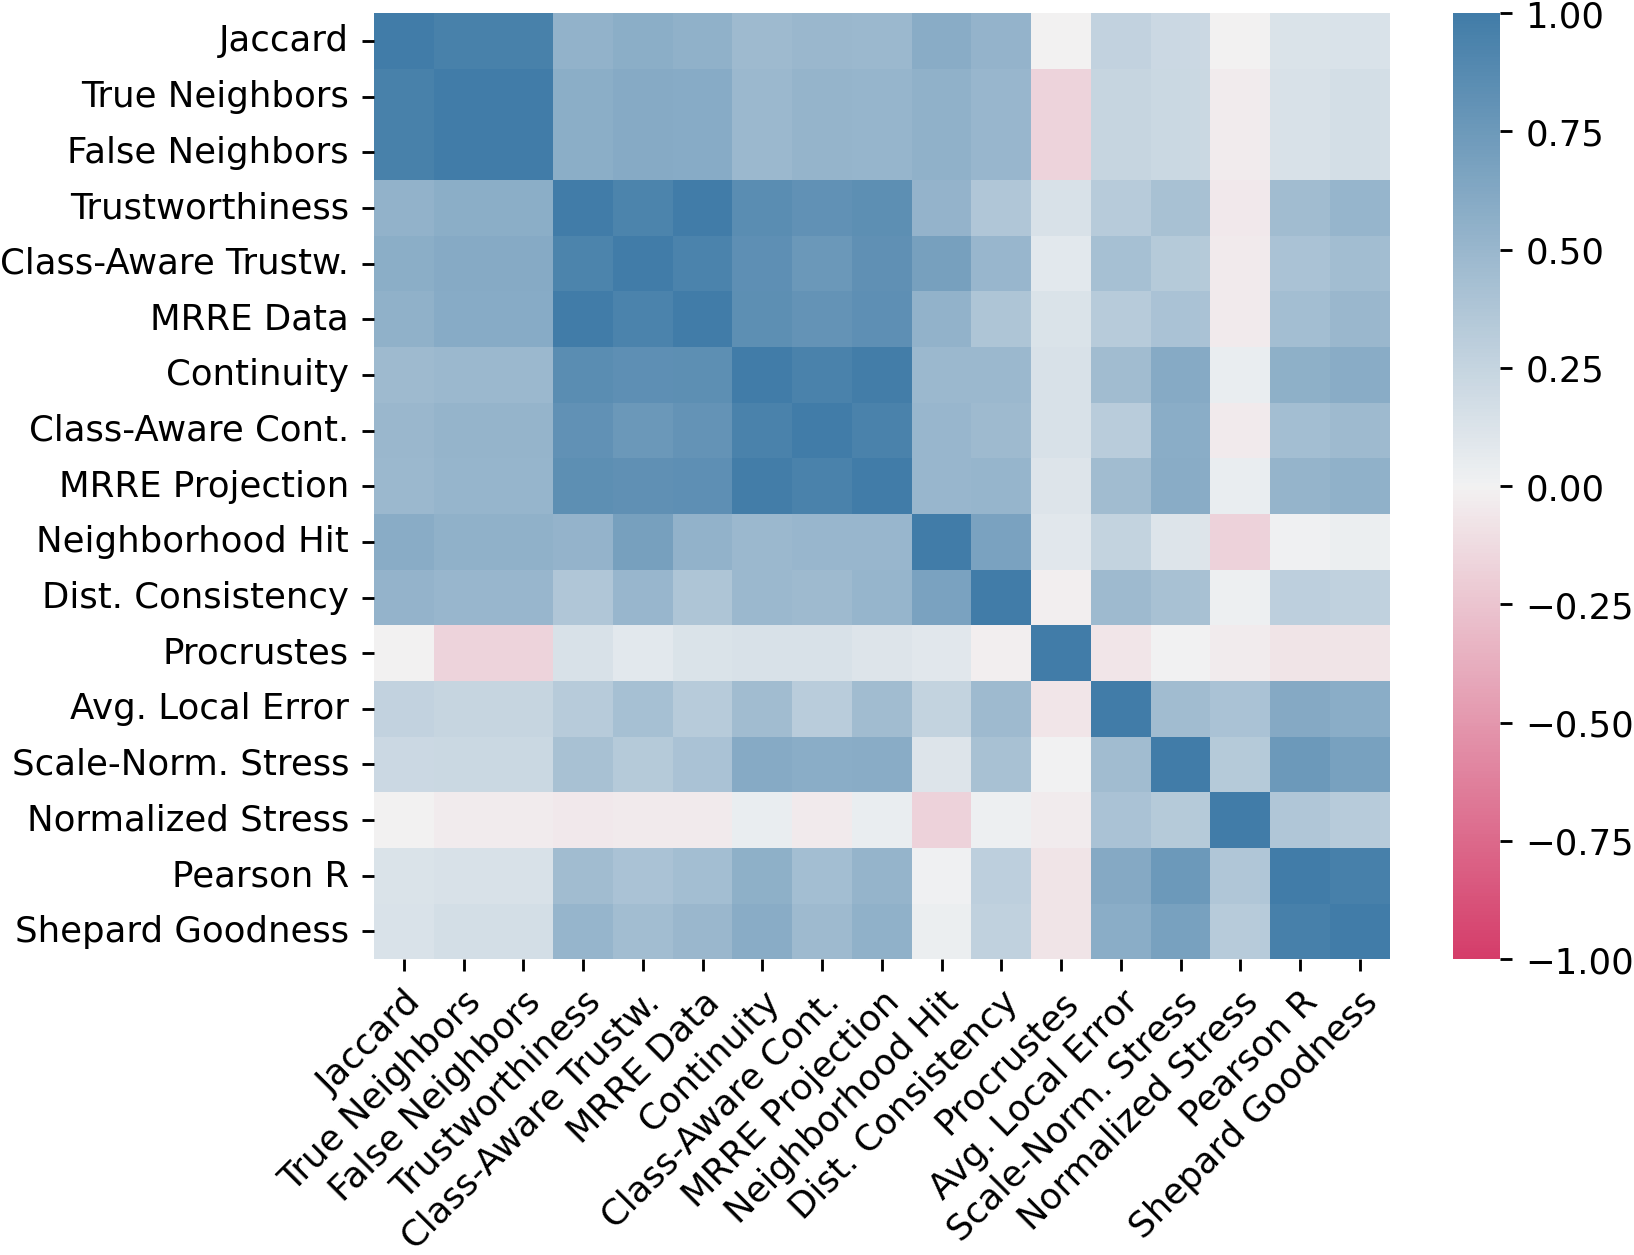

In [ ]:
METRIC_COLNAMES_REORDERED_3 = [
    "class_aware_continuity",
    "continuity",
    "mrre_proj",
    "trustworthiness",
    "class_aware_trustworthiness",
    "mrre_data",
    "jaccard",
    "true_neighbors",
    "false_neighbors",
    "average_local_error",
    "scale_normalized_stress",
    "pearson_correlation",
    "shepard_goodness",
    "neighborhood_hit",
    "distance_consistency",
    "normalized_stress",
    "procrustes",
]

fig, ax = setup_figure()

sns.heatmap(
    adapted_per_epoch_df[adapted_per_epoch_df.epoch.isin((-1, 1000))][METRIC_COLNAMES_REORDERED_2].corr(),
    cmap=corr_cmap,
    vmin=-1.0,
    vmax=1.0,
    xticklabels=(nice_names := [NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES_REORDERED_2]),
    yticklabels=nice_names,
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor',ha='right')
fig.savefig('./outputs/UniformizedMetricValuesCorrAllProjs.png')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

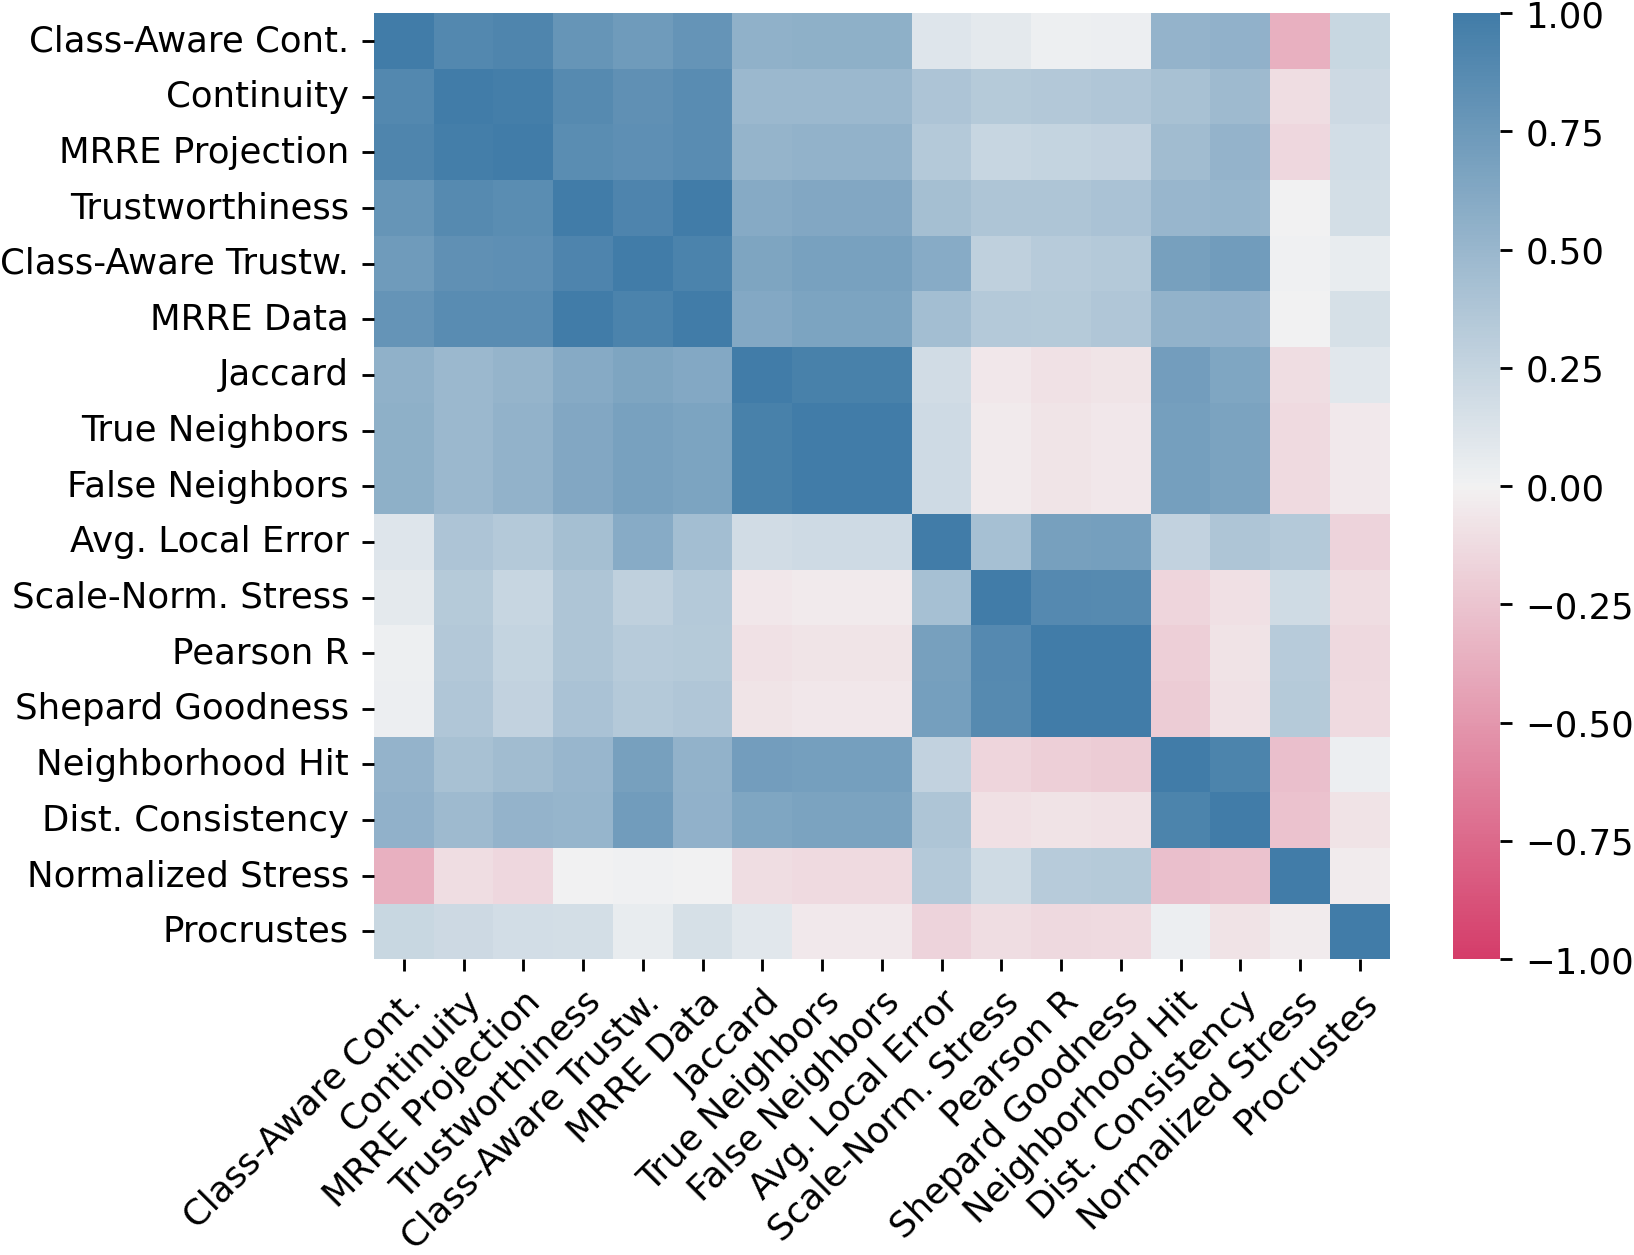

In [23]:


fig, ax = setup_figure()
sns.heatmap(
    adapted_per_epoch_df[adapted_per_epoch_df.epoch == -1][METRIC_COLNAMES_REORDERED_3].corr(),
    cmap=corr_cmap,
    vmin=-1.0,
    vmax=1.0,
    xticklabels=(nice_names := [NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES_REORDERED_3]),
    yticklabels=nice_names,
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor',ha='right')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

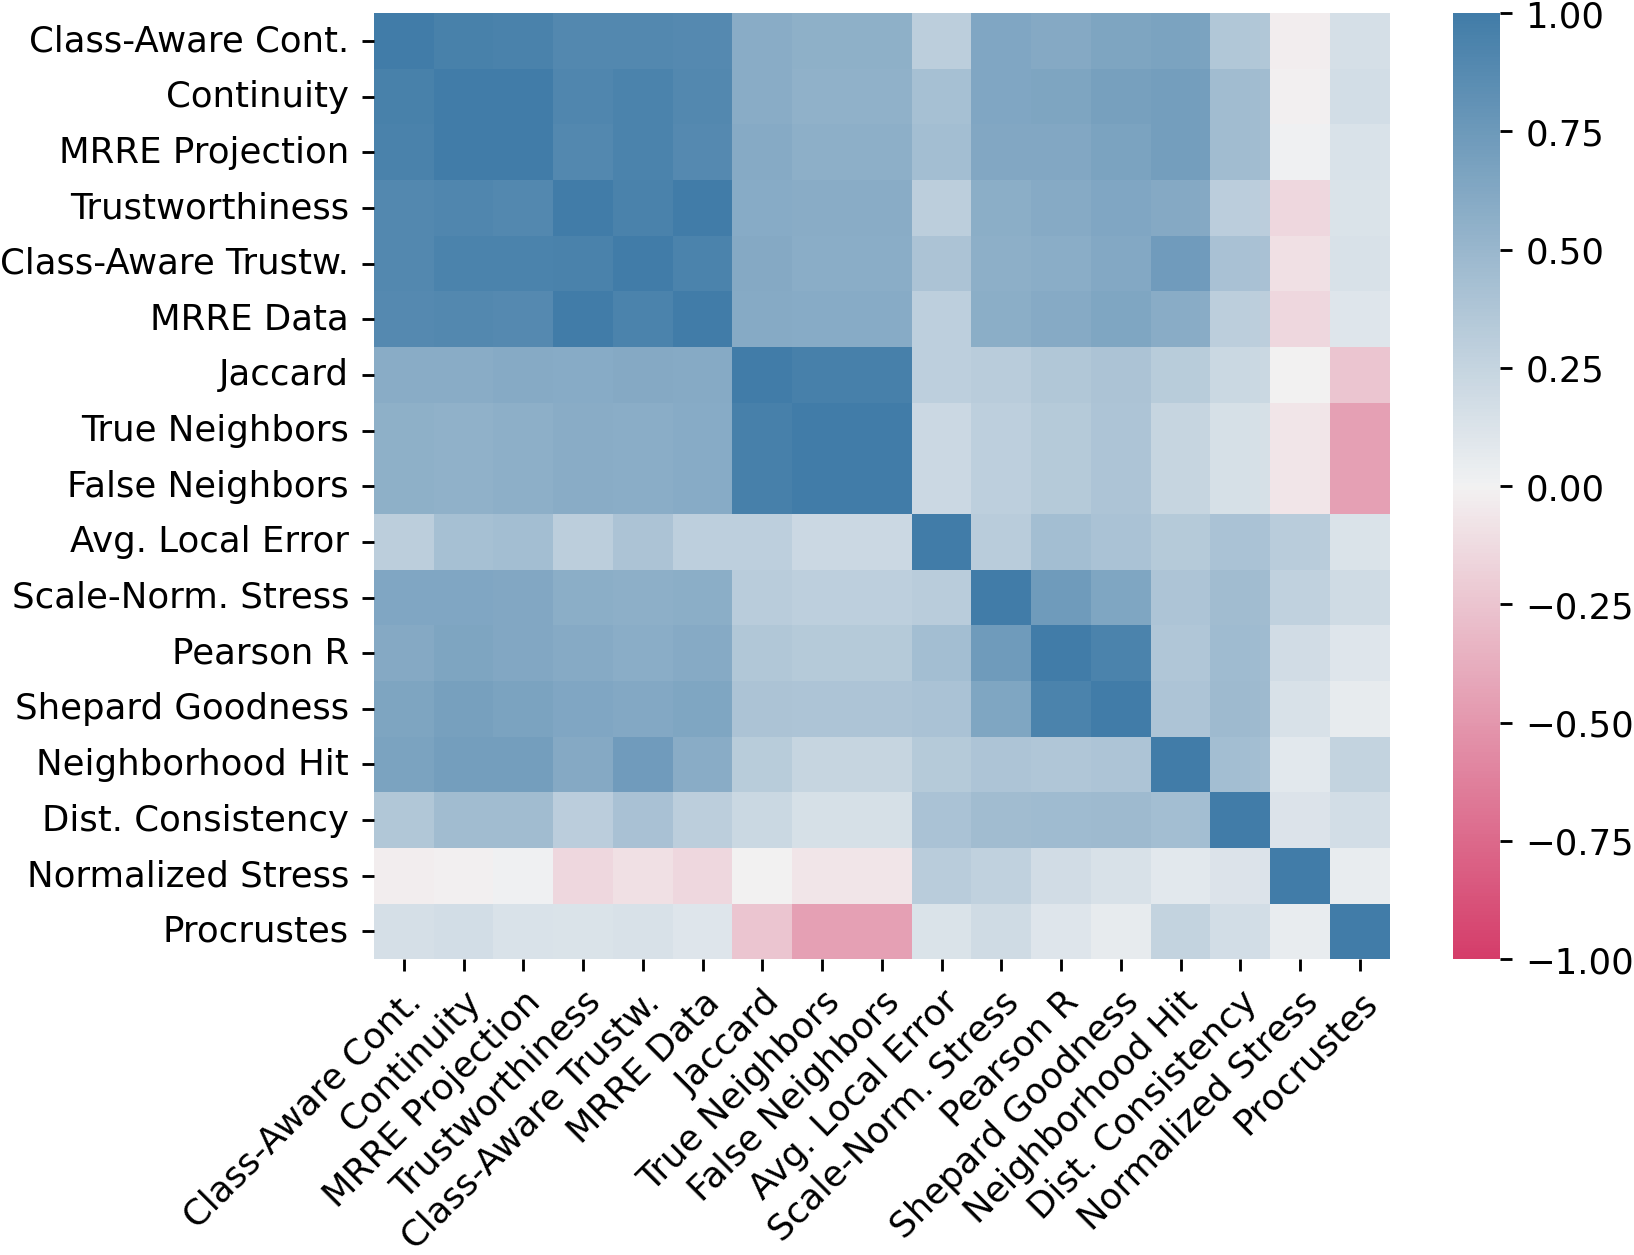

In [24]:
fig, ax = setup_figure()


sns.heatmap(
    adapted_per_epoch_df[adapted_per_epoch_df.epoch == 1000][METRIC_COLNAMES_REORDERED_3].corr(),
    cmap=corr_cmap,
    vmin=-1.0,
    vmax=1.0,
    xticklabels=(nice_names := [NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES_REORDERED_3]),
    yticklabels=nice_names,
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor',ha='right')
# fig.savefig('UniformizedMetricValuesCorrFooledProjections.png')


In [ ]:
def make_crosscorr_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    pre_fool = df.query("epoch == -1")
    post_fool = df.query("epoch == 1000")

    merged = pre_fool.merge(
        post_fool,
        how="inner",
        on=["dataset", "projection", "metric", "k"],
        validate="1:1",
        suffixes=("_pre", "_post"),
    )

    return merged[
        [f"{m}_pre" for m in METRIC_COLNAMES_REORDERED_3]
        + [f"{m}_post" for m in METRIC_COLNAMES_REORDERED_3]
    ].corr()
    


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

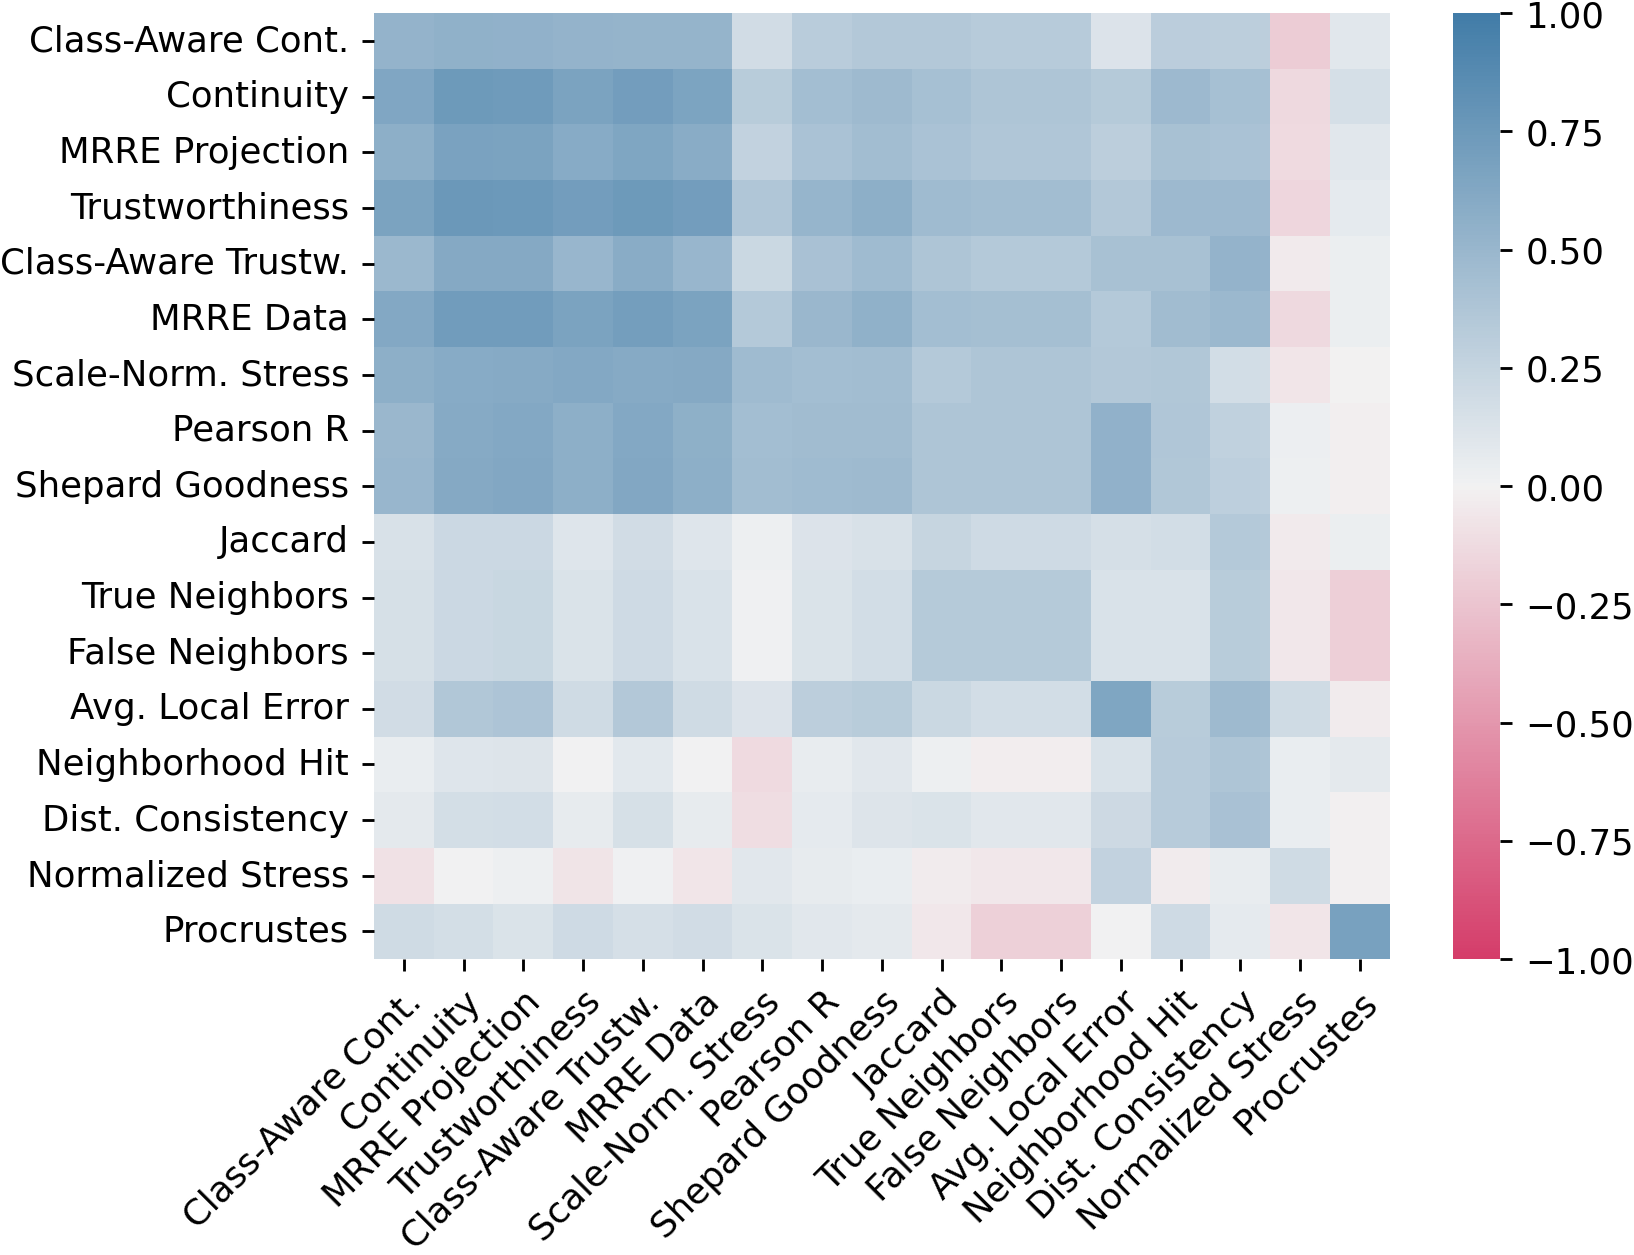

In [27]:
fig, ax = setup_figure()

METRIC_COLNAMES_REORDERED_4 = [
    "class_aware_continuity",
    "continuity",
    "mrre_proj",
    "trustworthiness",
    "class_aware_trustworthiness",
    "mrre_data",
    "scale_normalized_stress",
    "pearson_correlation",
    "shepard_goodness",
    "jaccard",
    "true_neighbors",
    "false_neighbors",
    "average_local_error",
    "neighborhood_hit",
    "distance_consistency",
    "normalized_stress",
    "procrustes",
]
crosscorr = make_crosscorr_df(adapted_per_epoch_df).loc[[f"{m}_pre" for m in METRIC_COLNAMES_REORDERED_4], [f"{m}_post" for m in METRIC_COLNAMES_REORDERED_4]]
sns.heatmap(
    crosscorr,
    cmap=corr_cmap,
    vmin=-1.0,
    vmax=1.0,
    xticklabels=(nice_names := [NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES_REORDERED_4]),
    yticklabels=nice_names,
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode="anchor", ha="right")


# Avg fooling per dataset

In [28]:
def avg_metrics(df: pd.DataFrame) -> pd.DataFrame:
    df_c = df.copy()
    means = df_c[METRIC_COLNAMES].mean(axis=0)
    df_c.loc[df_c.index[0], METRIC_COLNAMES] = means
    return df_c.iloc[0]

def stddev_metrics(df: pd.DataFrame) -> pd.DataFrame:
    df_c = df.copy()
    stddevs = df_c[METRIC_COLNAMES].std(axis=0)
    df_c.loc[df_c.index[0], METRIC_COLNAMES] = stddevs
    return df_c.iloc[0]

def both(df: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame.from_dict({'avg': avg_metrics(df), 'std': stddev_metrics(df)})

# data = per_epoch_diffs.groupby(by='dataset').apply(both, include_groups=False).reset_index()
# data = data[data.level_1.isin(METRIC_COLNAMES)]


/tmp/ipykernel_12466/1333752452.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.0)


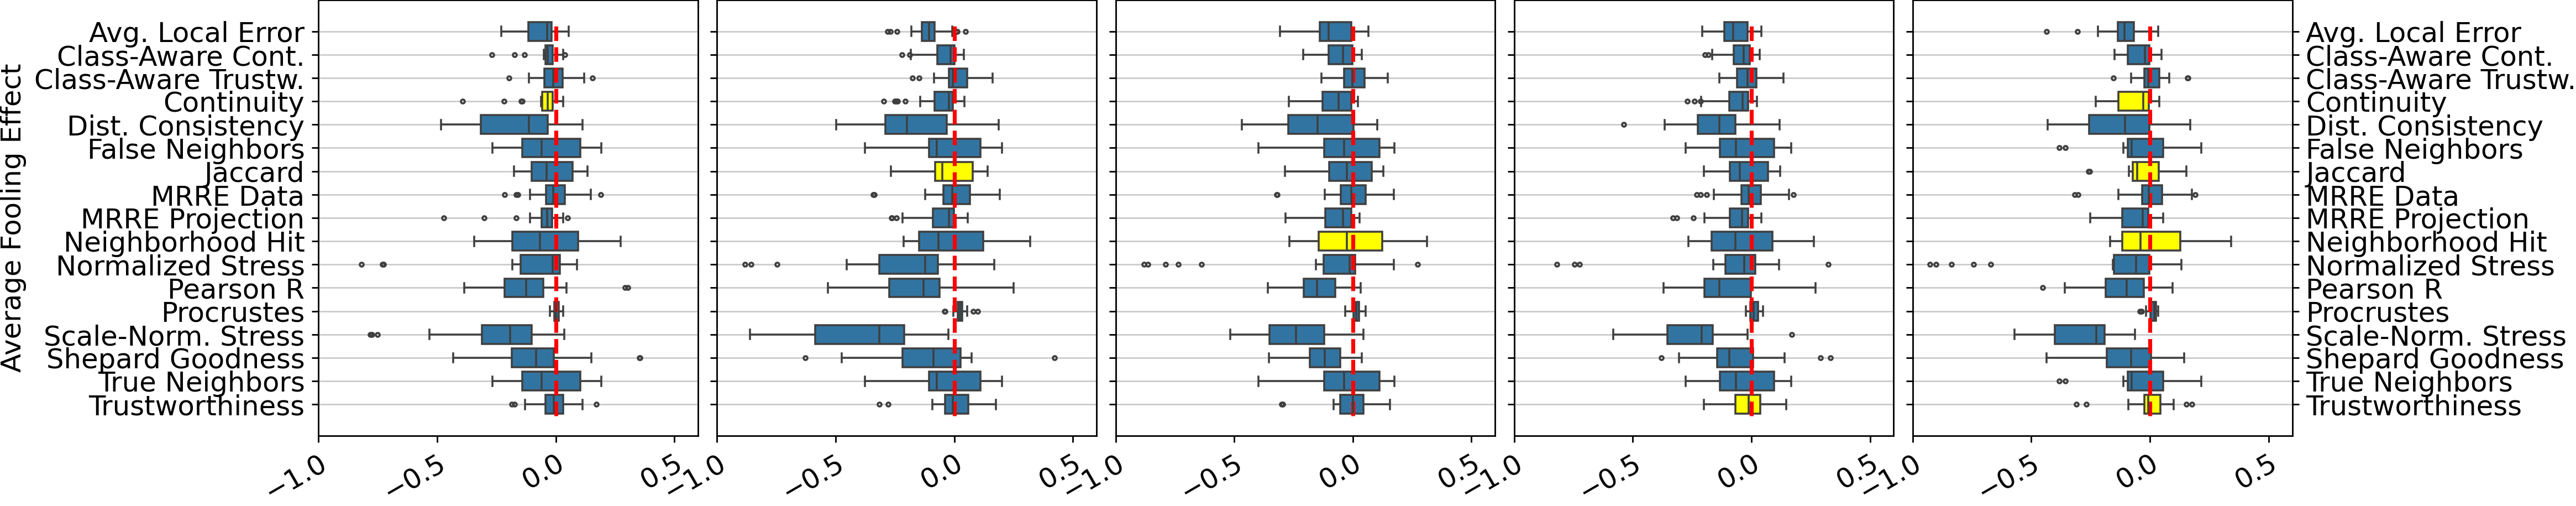

In [ ]:
from matplotlib import patches
import matplotlib.axis
from matplotlib.ticker import FormatStrFormatter


def diff_boxplot_across_datasets(df, metric: str, k=None, ax=None):
    mask = df.metric == metric
    if k is not None:
        mask &= df.k == k
    ax = sns.boxplot(
        data=df[mask]
        .rename(columns=lambda c: NICE_METRIC_NAMES.get(c, c))
        .melt(
            id_vars=[],
            value_vars=[NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES],
            var_name="metric",
        ),
        x="value",
        y="metric",
        ax=ax,
    )
    ax.grid(visible=True, axis="y", color="#CCCCCC")
    rects = [c for c in ax.get_children() if isinstance(c, patches.PathPatch)]
    if metric != "all":
        rect = rects[METRIC_COLNAMES.index(metric)]
        rect.set_facecolor("#FFFF00")
    else:
        [
            rects[i].set_facecolor("#FFFF00")
            for i in [
                METRIC_COLNAMES.index(m)
                for m in ("continuity", "neighborhood_hit", "jaccard", "trustworthiness")
            ]
        ]

    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    ax.set_ylabel("Average Fooling Effect")
    ax.set_xlabel("")
    # ax.set_xlim((-0.6, 1.0)) UNDO
    ax.set_xlim((-1.0, 0.6))
    # ax.hlines(y=0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors="r", linewidth=2.0, linestyles="dashed")
    ax.vlines(
        x=0,
        ymin=ax.get_ylim()[0],
        ymax=ax.get_ylim()[1],
        colors="r",
        linewidth=2.0,
        linestyles="dashed",
    )
    return ax


with plt.rc_context(
    {
        "axes.labelsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
    }
):
    # figs, axes = [], []
    fig, axes = plt.subplots(
        nrows=1,
        ncols=5,
        dpi=256,
        sharex=True,
        sharey=True,
        figsize=(18,4),
        gridspec_kw={"wspace": 0.05}
    )
    # fig.set_size_inches((18.0, 4.0))
    for metric, ax in zip(
        ("continuity", "jaccard", "neighborhood_hit", "trustworthiness", "all"), axes.flat
    ):
        ax = diff_boxplot_across_datasets(adapted_diff_df, metric, k=51, ax=ax)
    last_yaxis: matplotlib.axis.YAxis = axes.flat[-1].yaxis
    last_yaxis.set_tick_params(labelright=True, right=True)
    plt.tight_layout(pad=0.0)
    # fig.savefig("BoxPlotDiffs.png")
    fig.savefig("./outputs/BoxPlotDiffs_HigherIsBetter.pdf")

(-1.0, 1.0)

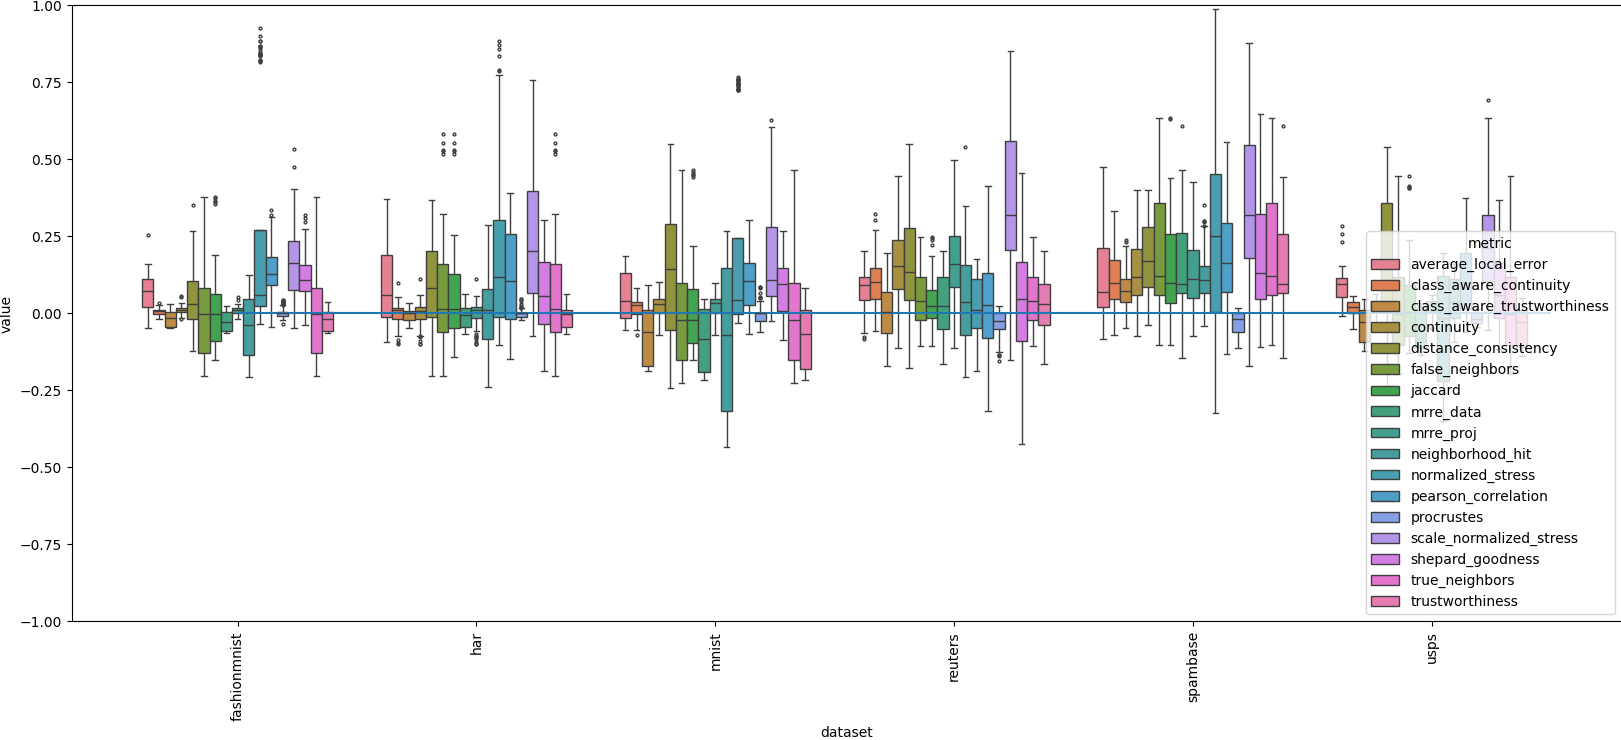

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = sns.boxplot(data=adapted_diff_df.melt(id_vars=['dataset'], value_vars=METRIC_COLNAMES, var_name='metric'), x='dataset', hue='metric', y='value', ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.hlines(y=0, xmin=0, xmax=ax.get_xlim()[1])
ax.set_ylim(-1, 1)

# Avg fooling per projection

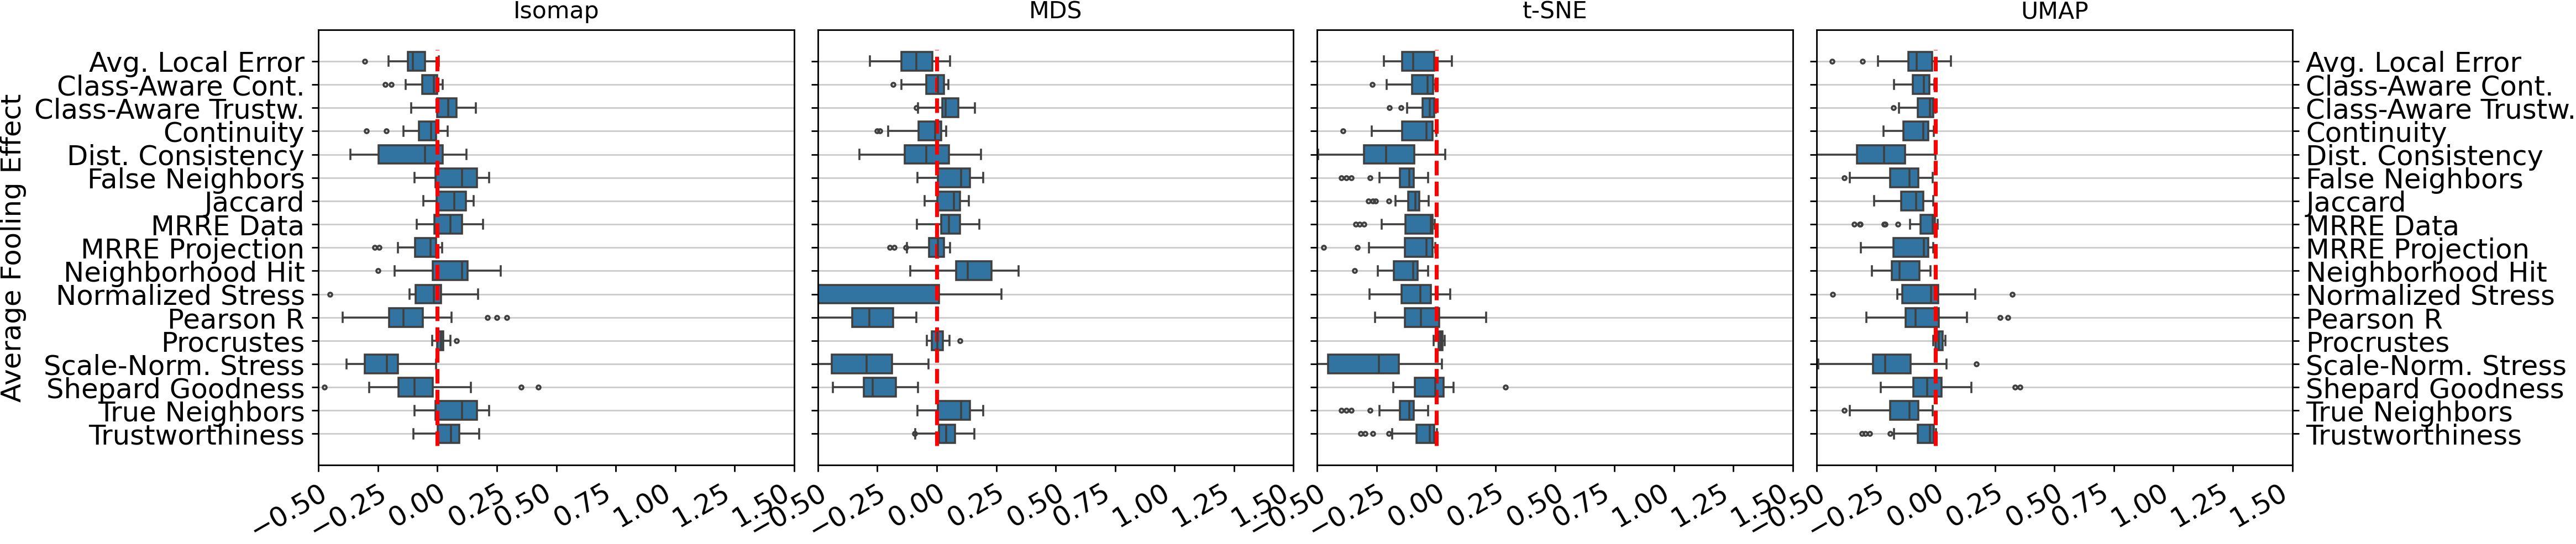

In [ ]:
from matplotlib import patches
import matplotlib.axis
from matplotlib.ticker import FormatStrFormatter

NICE_PROJ_NAMES = {
    "isomap": "Isomap",
    "mds": "MDS",
    "tsne": "t-SNE",
    "umap": "UMAP",
}


def diff_boxplot_for_projection(df, proj: str, k=None, ax=None):
    mask = df.projection == proj
    if k is not None:
        mask &= df.k == k
    ax = sns.boxplot(
        data=df[mask]
        .rename(columns=lambda c: NICE_METRIC_NAMES.get(c, c))
        .melt(
            id_vars=[],
            value_vars=[NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES],
            var_name="metric",
        ),
        x="value",
        y="metric",
        ax=ax,
    )
    ax.grid(visible=True, axis="y", color="#CCCCCC")
    ax.set_title(NICE_PROJ_NAMES[proj])

    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    ax.set_ylabel("Average Fooling Effect")
    ax.set_xlabel("")
    ax.set_xlim((-0.5, 1.5))
    # ax.hlines(y=0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors="r", linewidth=2.0, linestyles="dashed")
    ax.vlines(
        x=0,
        ymin=ax.get_ylim()[0],
        ymax=ax.get_ylim()[1],
        colors="r",
        linewidth=2.0,
        linestyles="dashed",
    )
    return ax


with plt.rc_context(
    {
        "axes.labelsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
    }
):
    # figs, axes = [], []
    fig, axes = plt.subplots(
        nrows=1,
        ncols=4,
        dpi=256,
        sharex=True,
        sharey=True,
        figsize=(18, 4),
        gridspec_kw={"wspace": 0.05},
    )
    # fig.set_size_inches((18.0, 4.0))
    for proj, ax in zip(("isomap", "mds", "tsne", "umap"), axes.flat):
        ax = diff_boxplot_for_projection(adapted_diff_df, proj, k=51, ax=ax)
    last_yaxis: matplotlib.axis.YAxis = axes.flat[-1].yaxis
    last_yaxis.set_tick_params(labelright=True, right=True)
    # fig.savefig("BoxPlotDiffsGroupedByProj.png")
    fig.savefig("./outputs/BoxPlotDiffsGroupedByProj_HigherIsBetter.pdf")

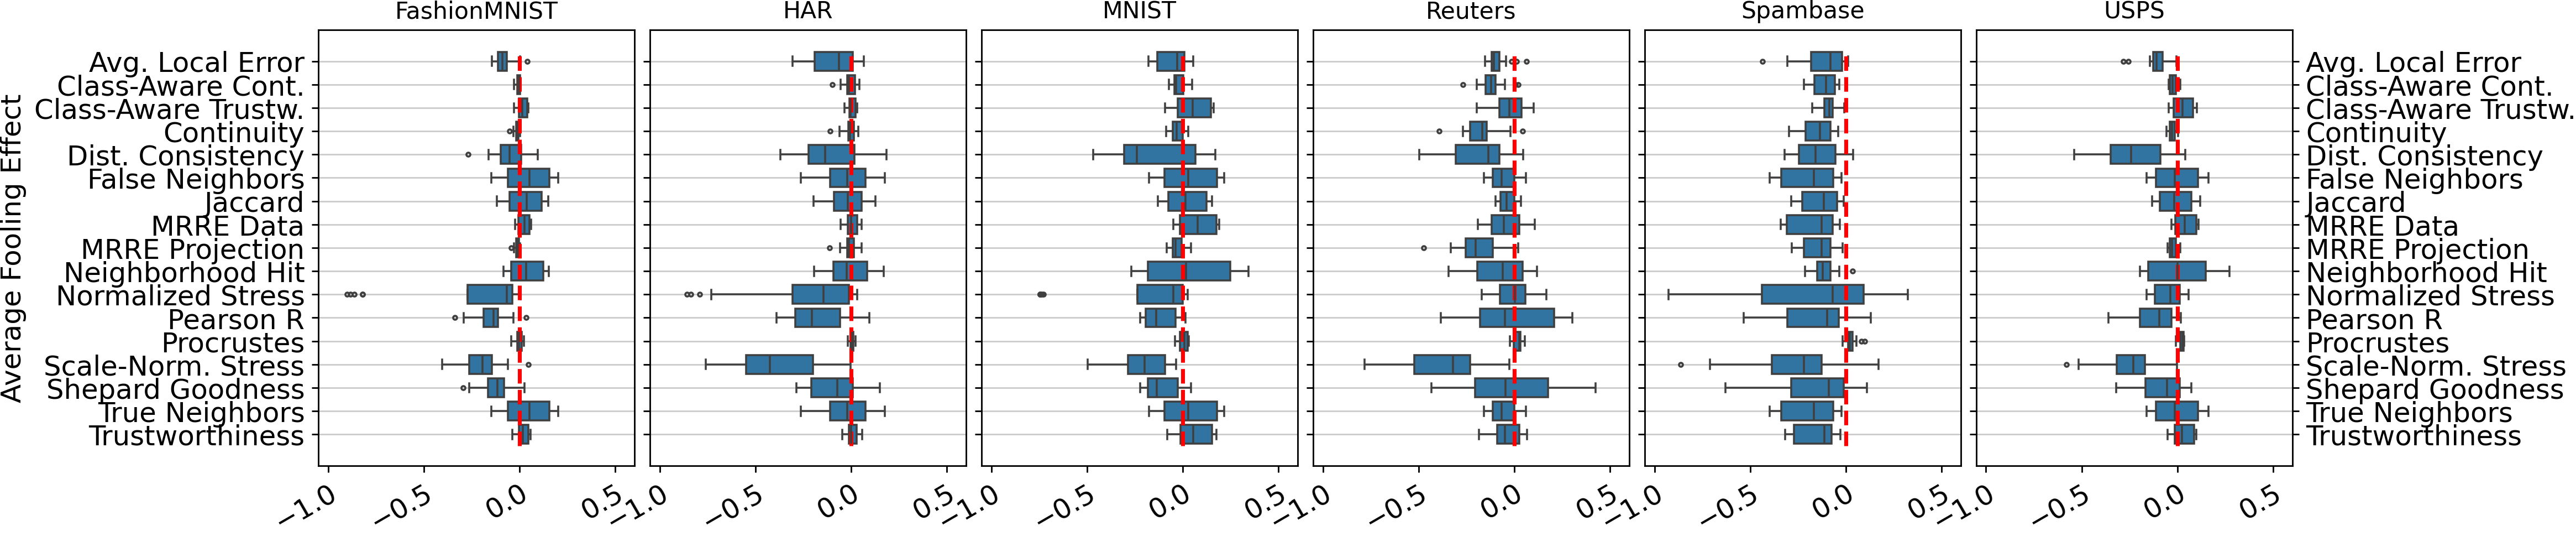

In [34]:
from matplotlib import patches
import matplotlib.axis
from matplotlib.ticker import FormatStrFormatter

NICE_DATASET_NAMES = {
    "mnist": "MNIST",
    "fashionmnist": "FashionMNIST",
    "usps": "USPS",
    "har": "HAR",
    "spambase": "Spambase",
    "reuters": "Reuters",
}


def diff_boxplot_for_dataset(df, dataset: str, k=None, ax=None):
    mask = df.dataset == dataset
    if k is not None:
        mask &= df.k == k
    ax = sns.boxplot(
        data=df[mask]
        .rename(columns=lambda c: NICE_METRIC_NAMES.get(c, c))
        .melt(
            id_vars=[],
            value_vars=[NICE_METRIC_NAMES[m] for m in METRIC_COLNAMES],
            var_name="metric",
        ),
        x="value",
        y="metric",
        ax=ax,
    )
    ax.grid(visible=True, axis="y", color="#CCCCCC")
    ax.set_title(NICE_DATASET_NAMES[dataset])

    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    ax.set_ylabel("Average Fooling Effect")
    ax.set_xlabel("")
    # ax.set_xlim((-0.6, 1.05)) UNDO
    ax.set_xlim((-1.05, 0.6))
    # ax.hlines(y=0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors="r", linewidth=2.0, linestyles="dashed")
    ax.vlines(
        x=0,
        ymin=ax.get_ylim()[0],
        ymax=ax.get_ylim()[1],
        colors="r",
        linewidth=2.0,
        linestyles="dashed",
    )
    return ax


with plt.rc_context(
    {
        "axes.labelsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
    }
):
    # figs, axes = [], []
    fig, axes = plt.subplots(
        nrows=1,
        ncols=6,
        dpi=256,
        sharex=True,
        sharey=True,
        figsize=(18, 4),
        gridspec_kw={"wspace": 0.05},
    )
    # fig.set_size_inches((18.0, 4.0))
    for dataset, ax in zip(
        ("fashionmnist", "har", "mnist", "reuters", "spambase", "usps"), axes.flat
    ):
        ax = diff_boxplot_for_dataset(adapted_diff_df, dataset, k=51, ax=ax)
        # ax.set_xticks([-0.5, 0.0, 0.5, 1.0]) # UNDO
        ax.set_xticks([-1.0, -0.5, 0.0, 0.5])
    last_yaxis: matplotlib.axis.YAxis = axes.flat[-1].yaxis
    last_yaxis.set_tick_params(labelright=True, right=True)
    # fig.savefig("BoxPlotDiffsGroupedByDataset.png")
    fig.savefig("BoxPlotDiffsGroupedByDataset_HigherIsBetter.pdf")